# Download Sentinel-1&2 Dataset from Kaggle

This notebook downloads the Sentinel-1&2 Image Pairs dataset segregated by terrain from Kaggle.

Dataset: https://www.kaggle.com/datasets/requiemonk/sentinel12-image-pairs-segregated-by-terrain

## Two Download Methods Available:

1. **Method 1 (Primary):** Using Kaggle API - Requires urllib3 downgrade and kernel restart
2. **Method 2 (Alternative):** Using opendatasets - More reliable, available in section 3a below

**If you encounter errors with Method 1, skip to Section 3a for the alternative method.**

## 1. Install Required Packages

First, we need to install the Kaggle API package.

**Note:** We install `urllib3<2.0` to avoid compatibility issues with the Kaggle API that can cause `TypeError: call() got an unexpected keyword argument 'headers'`.

In [20]:
# Install kaggle with compatible urllib3 version to avoid TypeError
# Force reinstall of urllib3 to ensure compatibility
!pip install --upgrade 'urllib3<2.0' --force-reinstall
!pip install --upgrade kaggle

python(7911) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached urllib3-1.26.20-py2.py3-none-any.whl.metadata (50 kB)
Using cached urllib3-1.26.20-py2.py3-none-any.whl (144 kB)
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.20
    Uninstalling urllib3-1.26.20:
      Successfully uninstalled urllib3-1.26.20


python(7913) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


**IMPORTANT:** After running the installation cell above, please **restart the kernel** to ensure the correct urllib3 version is loaded. 

You can restart the kernel by:
- Jupyter Notebook: Kernel → Restart
- VS Code: Click the restart button in the notebook toolbar

## 2. Setup Kaggle API Credentials

To use the Kaggle API, you need to:
1. Go to https://www.kaggle.com/account
2. Scroll to the "API" section
3. Click "Create New API Token" to download `kaggle.json`
4. Place the `kaggle.json` file in the appropriate location:
   - Linux/Mac: `~/.kaggle/kaggle.json`
   - Windows: `C:\Users\<username>\.kaggle\kaggle.json`

Alternatively, you can set up credentials programmatically below.

In [21]:
import os
from pathlib import Path

# Create .kaggle directory if it doesn't exist
kaggle_dir = Path.home() / '.kaggle'
kaggle_dir.mkdir(exist_ok=True)

# Uncomment and fill in your credentials if you want to set them programmatically
# kaggle_json = {
#     "username": "your_kaggle_username",
#     "key": "your_kaggle_api_key"
# }
# import json
# with open(kaggle_dir / 'kaggle.json', 'w') as f:
#     json.dump(kaggle_json, f)

# Set proper permissions for kaggle.json (Unix/Mac only)
if os.name != 'nt':  # Not Windows
    os.chmod(kaggle_dir / 'kaggle.json', 0o600)

print(f"Kaggle directory: {kaggle_dir}")
print(f"Kaggle credentials file exists: {(kaggle_dir / 'kaggle.json').exists()}")

Kaggle directory: /Users/jean-max/.kaggle
Kaggle credentials file exists: True


## 3. Download the Dataset (Method 1: Kaggle API)

Now we'll download the Sentinel-1&2 dataset using the Kaggle API.

**Note:** If this method fails even after kernel restart, use Method 2 in Section 3a below.

In [ ]:
# Set the download directory
download_dir = Path('../data/sentinel12-image-pairs-segregated-by-terrain')
download_dir.mkdir(parents=True, exist_ok=True)

print(f"Download directory: {download_dir.absolute()}")

Download directory: /Users/jean-max/Documents/Projets/SARATR-X/notebook/../data/sentinel12_dataset


In [23]:
# Download the dataset
dataset_name = 'requiemonk/sentinel12-image-pairs-segregated-by-terrain'

print(f"Downloading dataset: {dataset_name}")
print(f"This may take a while depending on the dataset size...\n")

# Method 1: Try using the Python API
try:
    import kaggle
    kaggle.api.dataset_download_files(
        dataset_name,
        path=str(download_dir),
        unzip=True
    )
    print("\nDownload complete!")
except Exception as e:
    print(f"\nAPI method failed with error: {e}")
    print("\nTrying alternative method using CLI...")
    
    # Method 2: Use kaggle CLI command as fallback
    import subprocess
    result = subprocess.run(
        ['kaggle', 'datasets', 'download', '-d', dataset_name, '-p', str(download_dir), '--unzip'],
        capture_output=True,
        text=True
    )
    
    if result.returncode == 0:
        print("Download complete using CLI method!")
    else:
        print(f"CLI method also failed: {result.stderr}")
        print("\nManual download option:")
        print(f"Run this command in terminal: kaggle datasets download -d {dataset_name} -p {download_dir} --unzip")

This may take a while depending on the dataset size...

Dataset URL: https://www.kaggle.com/datasets/requiemonk/sentinel12-image-pairs-segregated-by-terrain

API method failed with error: call() got an unexpected keyword argument 'headers'

Trying alternative method using CLI...


python(7952) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


KeyboardInterrupt: 

## Alternative Method: Using opendatasets

If the Kaggle API method above doesn't work, you can use the `opendatasets` library which often handles Kaggle downloads more reliably.

In [25]:
# Alternative: Install and use opendatasets
!pip install opendatasets

import opendatasets as od
from pathlib import Path

# Ensure download directory exists
download_dir_alt = Path('../data/sentinel12_dataset')
download_dir_alt.mkdir(parents=True, exist_ok=True)

# Download using opendatasets
# This will prompt for Kaggle username and API key if not already configured
dataset_url = 'https://www.kaggle.com/datasets/requiemonk/sentinel12-image-pairs-segregated-by-terrain'

print("If prompted, enter your Kaggle credentials:")
print("- Username: your Kaggle username")
print("- API Key: from ~/.kaggle/kaggle.json\n")

od.download(dataset_url, data_dir='../data')

print("\nDownload complete using opendatasets!")
print(f"Dataset saved to: {download_dir_alt.absolute()}")

python(8051) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


If prompted, enter your Kaggle credentials:
- Username: your Kaggle username
- API Key: from ~/.kaggle/kaggle.json

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Dataset URL: https://www.kaggle.com/datasets/requiemonk/sentinel12-image-pairs-segregated-by-terrain


100%|██████████| 2.55G/2.55G [00:08<00:00, 307MB/s]




Download complete using opendatasets!
Dataset saved to: /Users/jean-max/Documents/Projets/SARATR-X/notebook/../data/sentinel12_dataset


In [ ]:
import os

def list_files_recursive(directory, max_depth=3, current_depth=0, prefix=""):
    """List files in directory with tree structure"""
    if current_depth >= max_depth:
        return
    
    try:
        items = sorted(os.listdir(directory))
        for i, item in enumerate(items):
            path = os.path.join(directory, item)
            is_last = i == len(items) - 1
            current_prefix = "└── " if is_last else "├── "
            print(f"{prefix}{current_prefix}{item}")
            
            if os.path.isdir(path):
                next_prefix = prefix + ("    " if is_last else "│   ")
                list_files_recursive(path, max_depth, current_depth + 1, next_prefix)
    except PermissionError:
        print(f"{prefix}[Permission Denied]")

print(f"Contents of {download_dir}:\n")
list_files_recursive(download_dir)

# Count total files
total_files = sum([len(files) for _, _, files in os.walk(download_dir)])
print(f"\nTotal files downloaded: {total_files}")

Contents of ../data/sentinel12-image-pairs-segregated-by-terrain:

└── v_2
    ├── agri
    │   ├── s1
    │   └── s2
    ├── barrenland
    │   ├── s1
    │   └── s2
    ├── grassland
    │   ├── s1
    │   └── s2
    └── urban
        ├── s1
        └── s2

Total files downloaded: 32000


## 5. Dataset Information

Display basic information about the downloaded dataset.

In [64]:
!pip install matplotlib opencv-python

python(9801) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


  Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl.metadata (19 kB)
Using cached opencv_python-4.12.0.88-cp37-abi3-macosx_13_0_arm64.whl (37.9 MB)


Inspect image pairs.

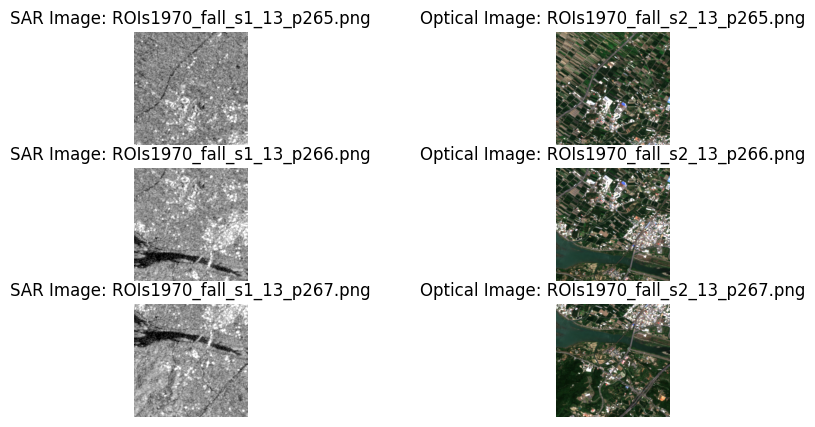

In [65]:
import matplotlib.pyplot as plt

data_path = Path('../data/sentinel12-image-pairs-segregated-by-terrain/v_2/')

pairs = ([], [])
for terrain in data_path.iterdir():
    sar = list((terrain / "s1").iterdir())
    opt = list((terrain / "s2").iterdir())

    for s, o in zip(sorted(sar), sorted(opt)):
        pairs[0].append(s)
        pairs[1].append(o)

plt.figure(figsize=(10, 5))
for i in range(3):
    plt.subplot(3, 2, 2*i + 1)
    sar_img = plt.imread(pairs[0][i])
    plt.imshow(sar_img, cmap='gray')
    plt.title(f'SAR Image: {pairs[0][i].name}')
    plt.axis('off')

    plt.subplot(3, 2, 2*i + 2)
    opt_img = plt.imread(pairs[1][i])
    plt.imshow(opt_img)
    plt.title(f'Optical Image: {pairs[1][i].name}')
    plt.axis('off')

Check all images are of same dimensions.

In [ ]:
import cv2

sar_dim = [cv2.imread(sar_pth).shape for sar_pth in pairs[0]]
opt_dim = [cv2.imread(opt_pth).shape for opt_pth in pairs[1]]

max(sar_dim), min(sar_dim), max(opt_dim), min(opt_dim)

((256, 256, 3), (256, 256, 3), (256, 256, 3), (256, 256, 3))